# SWMAL Exercise

In [210]:
# One data generator just to test out the MLP..
#   An MLP with just two neurons should be able to approximate this simple
#   down-up graph using its two non-linear sigmoid or tanh neurons...

import matplotlib.pyplot as plt
import numpy as np

def GenerateSimpleData():
    X = np.linspace(-10, 10, 100)
    y = 2*np.tanh(2*X - 12) - 3*np.tanh(2*X - 4)  
    y = 2*np.tanh(2*X + 2)  - 3*np.tanh(2*X - 4)   
    X = X.reshape(-1, 1) # Scikit-algorithms needs matrix in (:,1)-format
    return X,y

X, y_true = GenerateSimpleData()
# removing plots for simplicity during handin
#plt.plot(X, y_true, "r-.")
#plt.legend(["y_true"])
#plt.xlabel("X")
#plt.ylabel("y")
#plt.title("ANN, Groundtruth data simple")
           
print("OK")

OK


#### Qa)

The model is trained and plotted. It seems to be very good at predicting the correct values.

The coefficients are extracting the next question.

In [211]:
# Create MLP and fit model, just run..

from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(activation = 'tanh',      # activation function 
                   hidden_layer_sizes = [2], # layes and neurons in layers: one hidden layer with two neurons
                   alpha = 1e-5,             # regularization parameter
                   solver = 'lbfgs',         # quasi-Newton solver
                   max_iter=10000,
                   verbose = True)

mlp.fit(X, y_true)
y_pred = mlp.predict(X)

print("OK")

OK


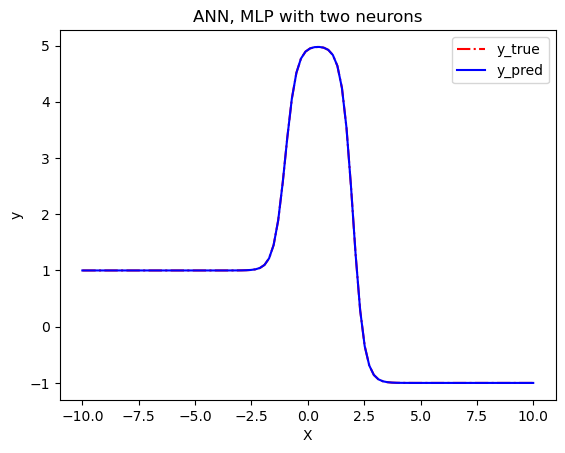

In [212]:
plt.plot(X, y_true, "r-.", label="y_true")
plt.plot(X, y_pred, "b-", label="y_pred")
plt.legend(["y_true", "y_pred"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, MLP with two neurons")
plt.show()

# it seems to completely overlap. we train on the same data we predict on. so.

#### Qb)

In [213]:
# Using just mlp.coefs_ and mlp.intercepts_ will result in some cryptic output.
# Indexing helps a bit, but we still have to know what to look for.
print("Network weights and biases:")
print(f"Hidden layer input weights: {mlp.coefs_[0]}")
print(f"Hidden layer biases: {mlp.intercepts_[0]}")
print(f"Hidden layer output weights: {mlp.coefs_[1]}")
print(f"Output bias: {mlp.intercepts_[1]}")

Network weights and biases:
Hidden layer input weights: [[-2.00004704 -2.00009579]]
Hidden layer biases: [ 4.00010767 -2.00014138]
Hidden layer output weights: [[ 2.99996578]
 [-1.99995668]]
Output bias: [1.57757415e-05]


![Drawing of the neural network](figs/drawing.png)

The drawing above shows the neural network with:
- **Input layer**: Single input with bias and identity functions
- **Hidden layer**: 2 neurons with associated weigths and tanh activation functions  
- **Output layer**: Single output with sumation
- **7 parameters total**: 4 weights + 3 biases

Note that if running the notebook again, the weights might change.

#### Qc)

We have chosen to use the values put into the drawing above.

This gives us the following function:

y_math = 2.99 * tanh(-2.00 * x + 4.00) - 1.99 * tanh(-2.00 * x - 2.00) + 0.00

#### Qd)

The y_math function is plotted and compared to the true values and the MLP predicted values.

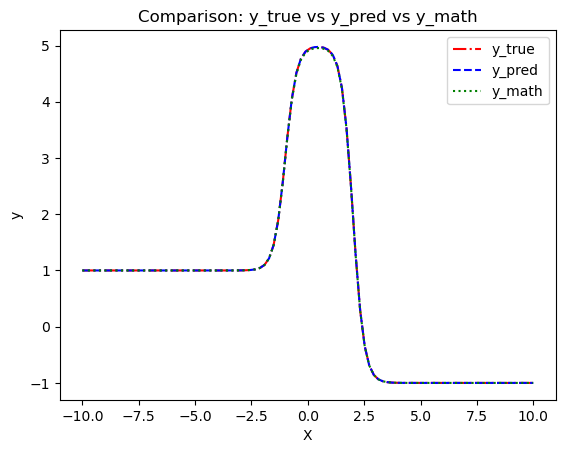

In [214]:
# Implemented as a lambda function so it looks just like above
y_math = lambda x: 2.99 * np.tanh(-2.00 * x + 4.00) - 1.99 * np.tanh(-2.00 * x - 2.00) + 0.00

# Simple plot comparing all three functions
y_math_values = y_math(X)

plt.plot(X, y_true, "r-.", label="y_true")
plt.plot(X, y_pred, "b--", label="y_pred")
plt.plot(X, y_math_values, "g:", label="y_math")
plt.legend(["y_true", "y_pred", "y_math"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison: y_true vs y_pred vs y_math")
plt.show()

# Again we see that they overlap

#### Qe)

Plotting the two halves of the function gives us a very good look into how it predicts.

They are monotonic since they dont have that steep drop, but instead rapidly decrease. 

In our case, one tanh function handles the "up" part and another handles the "down" part. With just two neurons with non-linear activation functions can now solve an "mountain" shaped function. Thats pretty cool.

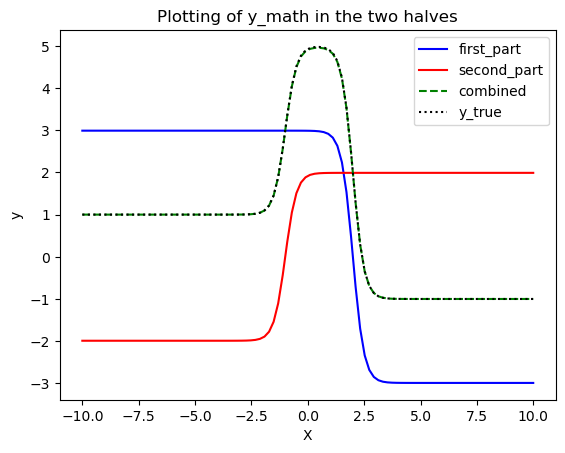

In [215]:
# Define the two parts as separate lambda functions and the bias as just a value
y_math_first_part = lambda x: 2.99 * np.tanh(-2.00 * x + 4.00)
y_math_second_part = lambda x: -1.99 * np.tanh(-2.00 * x - 2.00)
bias_part = 0.00

# Calculate the parts using X as before
y_first = y_math_first_part(X)
y_second = y_math_second_part(X)
y_combined = y_first + y_second + bias_part

# Simple plot showing the two halves
plt.plot(X, y_first, "b-", label="first_part")
plt.plot(X, y_second, "r-", label="second_part")
plt.plot(X, y_combined, "g--", label="combined")
plt.plot(X, y_true, "k:", label="y_true")
plt.legend(["first_part", "second_part", "combined", "y_true"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("Plotting of y_math in the two halves")
plt.show()

# Once again it overlaps

#### Qf)

We have chosen two hidden layers with 15 neurons in each.

When plotted with the true values, we can see that the MLP is very good at approximating the sinc function.

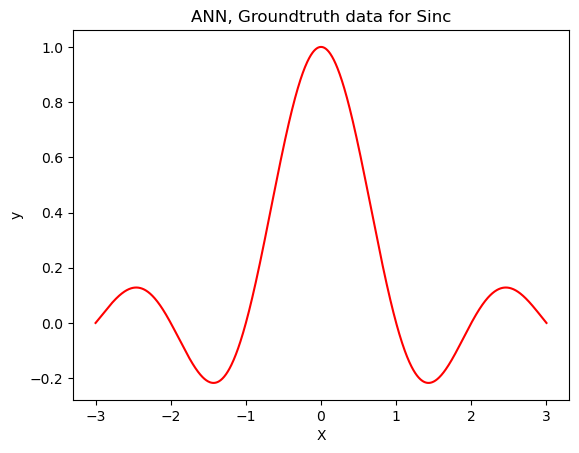

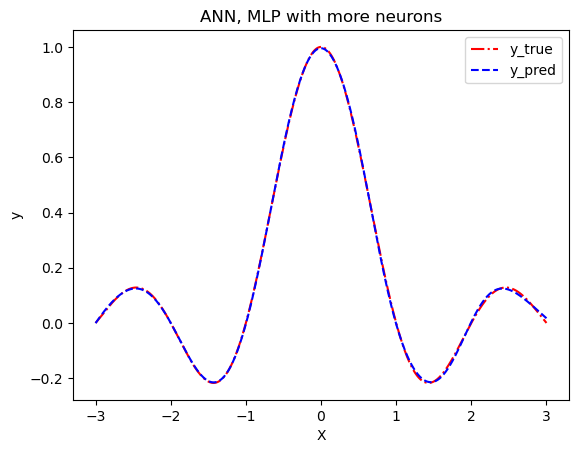

In [216]:
def GenerateSincData():
    # A Sinc curve, approximation needs more neurons to capture the 'ringing'...
    X = np.linspace(-3, 3, 1000) 
    y = np.sinc(X)
    X = X.reshape(-1,1)
    return X, y

X, y_true = GenerateSincData()
plt.plot(X, y_true, "r-")
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, Groundtruth data for Sinc")
plt.show()

# Create MLP with more capacity for the sinc function
mlp_sinc = MLPRegressor(activation = 'tanh',         # activation function 
                        hidden_layer_sizes = [15, 15], # two hidden layers with more neurons
                        alpha = 1e-5,                # regularization parameter
                        solver = 'lbfgs',            # quasi-Newton solver
                        max_iter=10000,
                        verbose = True)

mlp_sinc.fit(X, y_true)
y_pred_sinc = mlp_sinc.predict(X)

# Plot
plt.plot(X, y_true, "r-.", label="y_true")
plt.plot(X, y_pred_sinc, "b--", label="y_pred")
plt.legend(["y_true", "y_pred"])
plt.xlabel("X")
plt.ylabel("y")
plt.title("ANN, MLP with more neurons")
plt.show()

####  [OPTIONAL] Qg) 

Change the hyperparameters in the MLP, say the `alpha` to `1e5` and `1e-1`, and explain the results (hint: regularization).

Also, try out different `activation` functions `learning_rate`s and `solver`s, or other interesting hyperparameters found on the MLP regressor in the documentation.

Finally, implement the MLP regressor in `Keras` instead.

(Solvers aka. optimizers and regularization will be discussed in a later lecture.)

In [217]:
# TODO: do some experiments..

REVISIONS||
:- | :- |
2021-10-04| CEF, initial, converted from old word format.
2021-10-04| CEF, inserted ANN_example.py into Notebook.
2023-03-06| CEF, minor table update.
2023-03-09| CEF, major update, translated to English, elaborated on NNs as Universal Approximator.